<a href="https://colab.research.google.com/github/JChengecha/Future-Contraceptive-Use/blob/main/Intelligent_Forecasting_Challenge_Model_Future_Contraceptive__Use_in_Cote_d'Ivoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intelligent Forecasting Challenge

## Defining The Question

### Specifying The Question

### Defining The Metric for Success

### Understanding The Context

### Recording The Experimental Design

### Data Relevance

## Reading The Data

## Checking The Data

## External Datasource Validation

## Tidying the datasets

## **Reading The Data**

In [63]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [64]:
# READING OUR ANNUAL DATASET
annual = pd.read_csv('contraceptive_case_data_annual.csv')

# Reading our monthly
monthly = pd.read_csv('monthly_cases.csv')

# Reading service delivery site data
site = pd.read_csv('service_delivery_site_data.csv')

# Reading our Train dataset
df = pd.read_csv('Train.csv')

# Reading the product dataset
prod = pd.read_csv('product.csv')

In [65]:
# Previewing our Annual dataset
annual.head(5)

,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [66]:
# previewing the monthly dataset
monthly.head(5)

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [67]:
# previewing the site dataset
site.head(5)

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [68]:
# Previewing our Train dataset
df.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [69]:
# Check the records we have in our annual dataset
print('annual dataset\n',annual.shape,'\n')
print('monthly dataset\n',monthly.shape,'\n')
print('Train dataset\n',df.shape,'\n')


annual dataset
 (339, 27) 

monthly dataset
 (678, 28) 

Train dataset
 (35753, 14) 



### Checking the information of the Datasets 

In [70]:
# checking the info on our annual dataset 
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     339 non-null    object 
 1   year                         339 non-null    int64  
 2   implant_women_old            326 non-null    float64
 3   implant_women_new            337 non-null    float64
 4   injection2_women_old         337 non-null    float64
 5   injection2_women_new         334 non-null    float64
 6   injection3_women_old         339 non-null    int64  
 7   injection3_women_new         339 non-null    int64  
 8   pill_women_old               339 non-null    float64
 9   pill_women_new               338 non-null    float64
 10  iud_women_old                212 non-null    float64
 11  iud_women_new                277 non-null    float64
 12  iud_number_dispensed         233 non-null    float64
 13  implant_number_dispe

In [71]:
# checking the info on our monthly dataset 
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district                     678 non-null    object 
 1   month                        678 non-null    int64  
 2   year                         678 non-null    int64  
 3   implant_women_old            610 non-null    float64
 4   implant_women_new            672 non-null    float64
 5   injection2_women_old         556 non-null    float64
 6   injection2_women_new         481 non-null    float64
 7   injection3_women_old         678 non-null    int64  
 8   injection3_women_new         678 non-null    int64  
 9   pill_women_old               621 non-null    float64
 10  pill_women_new               595 non-null    float64
 11  iud_women_old                250 non-null    float64
 12  iud_women_new                306 non-null    float64
 13  iud_number_dispensed

In [72]:
# checking the info on our train dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

In [73]:
# Summary of the numerical attributes
annual.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,339.0,2017.000000,0.817704,2016.0,2016.00,2017.0,2018.00,2018.0
implant_women_old,326.0,1499.193252,2975.216904,1.0,90.75,459.0,1430.00,23226.0
implant_women_new,337.0,572.875371,633.746985,5.0,146.00,350.0,749.00,3959.0
injection2_women_old,337.0,1097.528190,1641.024406,2.0,132.00,498.0,1295.00,10349.0
injection2_women_new,334.0,243.158683,398.174681,1.0,60.00,145.0,293.75,4535.0
injection3_women_old,339.0,5657.554572,25958.064589,144.0,1612.50,2828.0,5433.00,475882.0
injection3_women_new,339.0,1065.843658,809.122417,65.0,460.00,879.0,1456.00,5164.0
pill_women_old,339.0,1206.662832,1774.006091,1.0,154.00,490.0,1502.00,12508.0
pill_women_new,338.0,269.105621,615.979742,1.0,60.50,141.0,311.25,8376.0
iud_women_old,212.0,138.396226,367.104029,1.0,12.00,37.5,130.00,3482.0


In [74]:
# Summary of the numerical attributes
monthly.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,678.0,3.500000,1.709086,1.0,2.00,3.5,5.00,6.0
year,678.0,2019.000000,0.000000,2019.0,2019.00,2019.0,2019.00,2019.0
implant_women_old,610.0,213.509836,358.961649,1.0,12.00,75.0,288.50,2883.0
implant_women_new,672.0,77.831845,108.731927,1.0,21.00,45.0,87.00,1344.0
injection2_women_old,556.0,39.429856,71.846085,1.0,6.00,18.0,50.00,1259.0
injection2_women_new,481.0,9.428274,12.449881,1.0,2.00,5.0,12.00,133.0
injection3_women_old,678.0,495.436578,467.385785,20.0,184.50,320.0,665.75,2534.0
injection3_women_new,678.0,110.523599,94.042050,7.0,51.00,87.0,136.75,1061.0
pill_women_old,621.0,98.466989,126.187320,1.0,15.00,45.0,130.00,726.0
pill_women_new,595.0,17.986555,26.655676,1.0,5.00,10.0,21.00,314.0


In [75]:
# Summary of the numerical attributes
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,35753.0,2017.433782,1.019933,2016.0,2017.0,2017.0,2018.0,2019.0
month,35753.0,6.169412,3.429079,1.0,3.0,6.0,9.0,12.0
stock_initial,35753.0,63.245518,168.661538,0.0,0.0,12.0,69.0,4320.0
stock_received,35753.0,14.846055,70.631782,0.0,0.0,0.0,0.0,3534.0
stock_distributed,35753.0,14.764327,39.848242,0.0,0.0,1.0,13.0,1728.0
stock_adjustment,35753.0,0.961150,37.883099,-1440.0,0.0,0.0,0.0,3003.0
stock_end,35753.0,64.288395,170.848479,0.0,0.0,13.0,70.0,4320.0
average_monthly_consumption,35753.0,14.606439,32.521384,0.0,0.0,3.0,16.0,864.0
stock_stockout_days,35753.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
stock_ordered,34990.0,26.658102,107.166082,0.0,0.0,0.0,20.0,10240.0


#### Merging The Train Dataset 

In [91]:
# Merging the train dataset with the relevant columns

# adopting the site type column to the train dataset
df=pd.merge(site[['site_code','site_type']],df,how='inner',left_on=['site_code'],right_on=['site_code'])

# adopting the product type column to the train dataset
df = pd.merge(prod[['product_code','product_type']],df,how='inner',left_on=['product_code'],right_on=['product_code'])

# dropping the product code column
df.drop(columns=['product_code'], axis = 1, inplace=True)

df.head(5)

,product_type,site_code,site_type,year,month,region,district,stock_initial,stock_received,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,stock_distributed2
0,Female Condom,C4001,Hospital,2016,1,INDENIE-DJUABLIN,ABENGOUROU,0,0,0,0,0,0,0.0,0.0
1,Female Condom,C2002,Hospital,2017,1,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0.0,0.0
2,Female Condom,C2002,Hospital,2017,2,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0.0,0.0
3,Female Condom,C2002,Hospital,2017,3,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0.0,0.0
4,Female Condom,C2002,Hospital,2017,4,MARAHOUE,BOUAFLE,0,0,0,0,0,0,0.0,0.0


#### **ENSURING THE DATASET CONTAIN NO DUPLICATE VALUES**


In [76]:
# Check for the consistency in our data
print('annual\n',annual.duplicated().sum())
print('monthly\n',monthly.duplicated().sum())
print('train\n',df.duplicated().sum())


annual
 0
monthly
 0
train
 0


#### **TAKING CARE OF MISSING VALUES**

##### Annual dataset

In [77]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = annual.isnull().sum() 
#the count of all values
value_count = annual.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
year                             0        0.00
implant_women_old               13        3.83
implant_women_new                2        0.59
injection2_women_old             2        0.59
injection2_women_new             5        1.47
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                   0        0.00
pill_women_new                   1        0.29
iud_women_old                  127       37.46
iud_women_new                   62       18.29
iud_number_dispensed           106       31.27
implant_number_dispensed         6        1.77
injection2_number_dispensed      8        2.36
injection3_number_dispensed      1        0.29
pill_number_dispensed            5        1.47
iud_number_received             94       27.73
implant_number_received          6        1.77
injection2_number_received      11        3.24
injection3_nu

In [78]:
#Dropping the iud_stock_end and injection2_stock_end
annual.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [79]:
# filling the null values with zero
annual.fillna(0, inplace=True)
annual.isnull().sum()

district                       0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

##### monthly dataset

In [80]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = monthly.isnull().sum() 
#the count of all values
value_count = monthly.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
district                         0        0.00
month                            0        0.00
year                             0        0.00
implant_women_old               68       10.03
implant_women_new                6        0.88
injection2_women_old           122       17.99
injection2_women_new           197       29.06
injection3_women_old             0        0.00
injection3_women_new             0        0.00
pill_women_old                  57        8.41
pill_women_new                  83       12.24
iud_women_old                  428       63.13
iud_women_new                  372       54.87
iud_number_dispensed           429       63.27
implant_number_dispensed        29        4.28
injection2_number_dispensed    170       25.07
injection3_number_dispensed     16        2.36
pill_number_dispensed           63        9.29
iud_number_received            344       50.74
implant_number_received         35        5.16
injection2_nu

In [81]:
#Dropping the iud_stock_end and injection2_stock_end
monthly.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [82]:
# filling the null values with zero
monthly.fillna(0, inplace=True)
monthly.isnull().sum()

district                       0
month                          0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

##### Train dataset

In [83]:
#Calaculating the percentage of missing values and the visualising it 
# Count the missing values
missing_count = df.isnull().sum() 
#the count of all values
value_count = df.isnull().count() 
#the percetage of missing values
missing_percentage = round(missing_count / value_count * 100,2) 
#Cretaing a dataframe
missing_df = pd.DataFrame({'count' : missing_count, 'percentage' : missing_percentage}) 
print(missing_df)

                             count  percentage
year                             0        0.00
month                            0        0.00
region                           0        0.00
district                         0        0.00
site_code                        0        0.00
product_code                     0        0.00
stock_initial                    0        0.00
stock_received                   0        0.00
stock_distributed                0        0.00
stock_adjustment                 0        0.00
stock_end                        0        0.00
average_monthly_consumption      0        0.00
stock_stockout_days              0        0.00
stock_ordered                  763        2.13


#### **TAKING CARE OF INVALID ZEROS IN OUR DATASET**


These invalid 0 values may be identified, for example, when:

A) All fields (possibly with the exception of stock_ordered) are recorded as '0' for a given contraceptive product, month and service delivery site; or

B) Stock_distributed for a contraceptive product at a service delivery site is reported in a given month as '0', even though stock was available (stock_initial was above 0) and stock_distributed is historically well above 0.

In [84]:
# Defining a function that takes the conditions listed above and fills invalid zeros with a ?
def invalid(stock_intial, average, stock_dist):
    if stock_intial > 0 and average > 0 and stock_dist == 0:
      stock_dist = '?'
    else:
        stock_dist=stock_dist
    return stock_dist

#Mapping our function onto a new column
df['NewColumn_1'] = df.apply(lambda x: invalid(x['stock_initial'], x['average_monthly_consumption'], x['stock_distributed']), axis=1)
df.replace('?', np.nan, inplace=True)
df.rename(columns={"NewColumn_1" : "stock_distributed2"}, inplace = True)

In [85]:
#Cheking missing values on our columns
df.isnull().sum()

year                              0
month                             0
region                            0
district                          0
site_code                         0
product_code                      0
stock_initial                     0
stock_received                    0
stock_distributed                 0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                   763
stock_distributed2             2858
dtype: int64

In [86]:
# Dropping the stock_distrubeted column
df.drop(columns = ["stock_distributed"], inplace = True )

In [87]:
#Filling null values with the mode
df["stock_ordered"].fillna(df["stock_ordered"].mode()[0], inplace = True)

# Cheking if null values have been replaced with the mode
df.isnull().sum()

year                              0
month                             0
region                            0
district                          0
site_code                         0
product_code                      0
stock_initial                     0
stock_received                    0
stock_adjustment                  0
stock_end                         0
average_monthly_consumption       0
stock_stockout_days               0
stock_ordered                     0
stock_distributed2             2858
dtype: int64

In [88]:
#Dropping the null values in our stock_distributed2 column
df.dropna(axis = 0, inplace = True)

In [89]:
#Cheking to see whether the null values have been dropped
df.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
stock_distributed2             0
dtype: int64

#### **CHECKING AND TAKING CARE OF ANY OUTLIERS IN OUR DATASET**

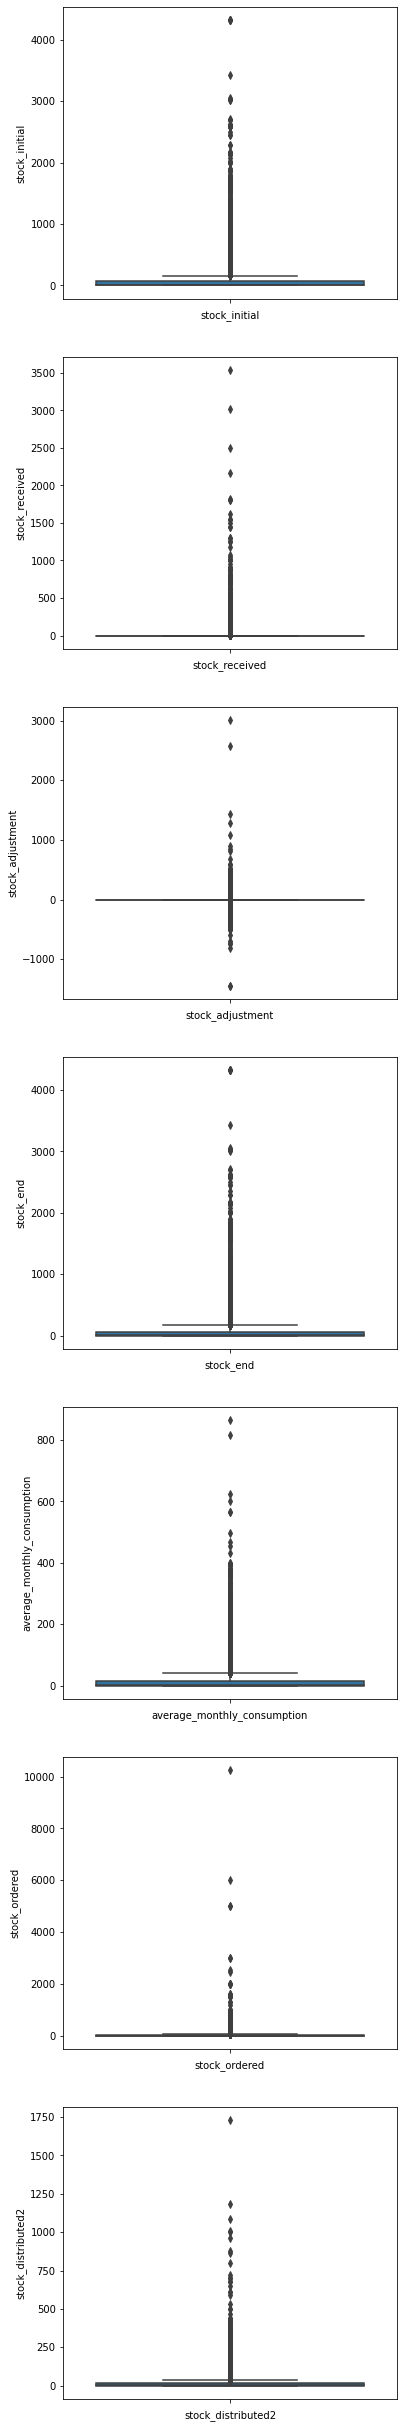

In [ ]:
# Checking for outliers for numeric variables
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.boxplot(y=df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

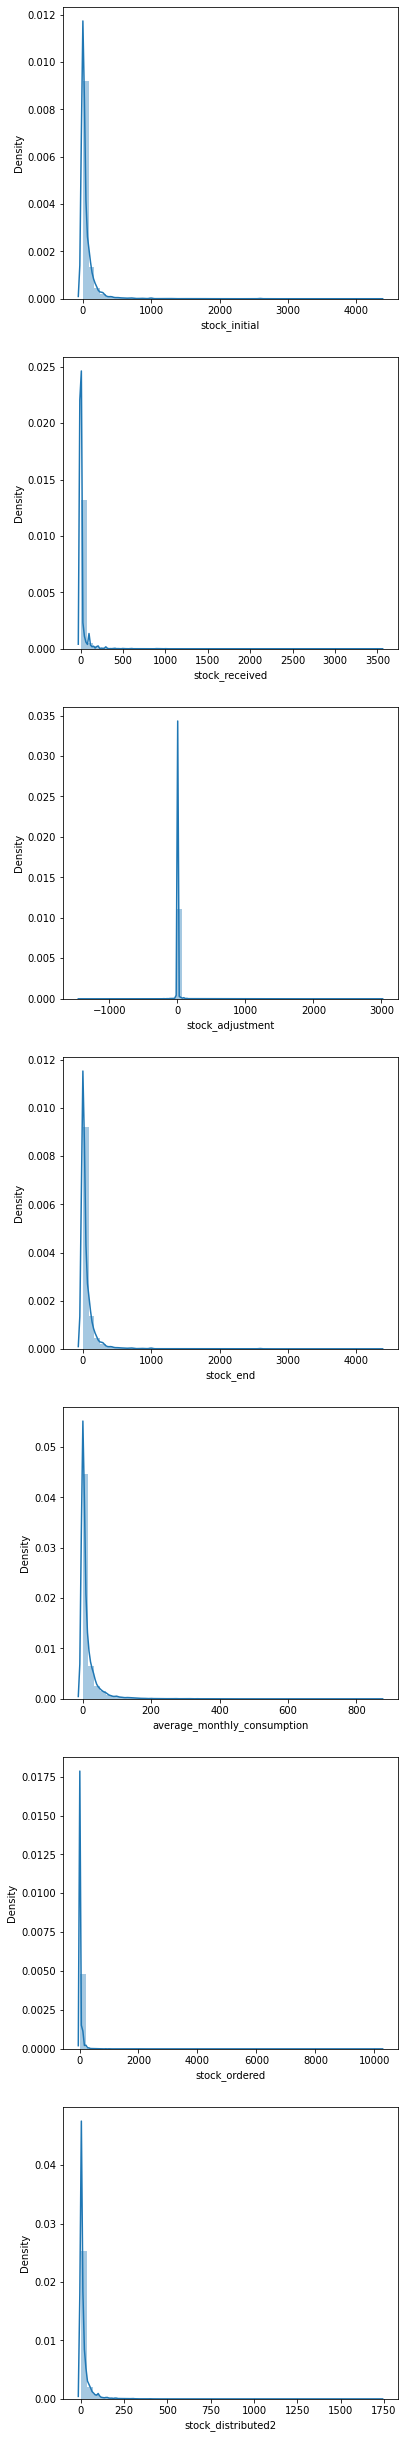

In [90]:
import seaborn as sns
cols = ['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered', 'stock_distributed2']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(df[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)

The Number of outliers after dropping is quite significant so we won't drop the outliers because we may lose valuable information, we will consider log transformation instead for this case of our dataset

In [97]:
#Exporting to csv
annual.to_csv("Contraceptive_case_data_annual_cleaned.csv")

df.to_csv("train_cleaned.csv")

monthly.to_csv("monthly_cleaned.csv")

EDA

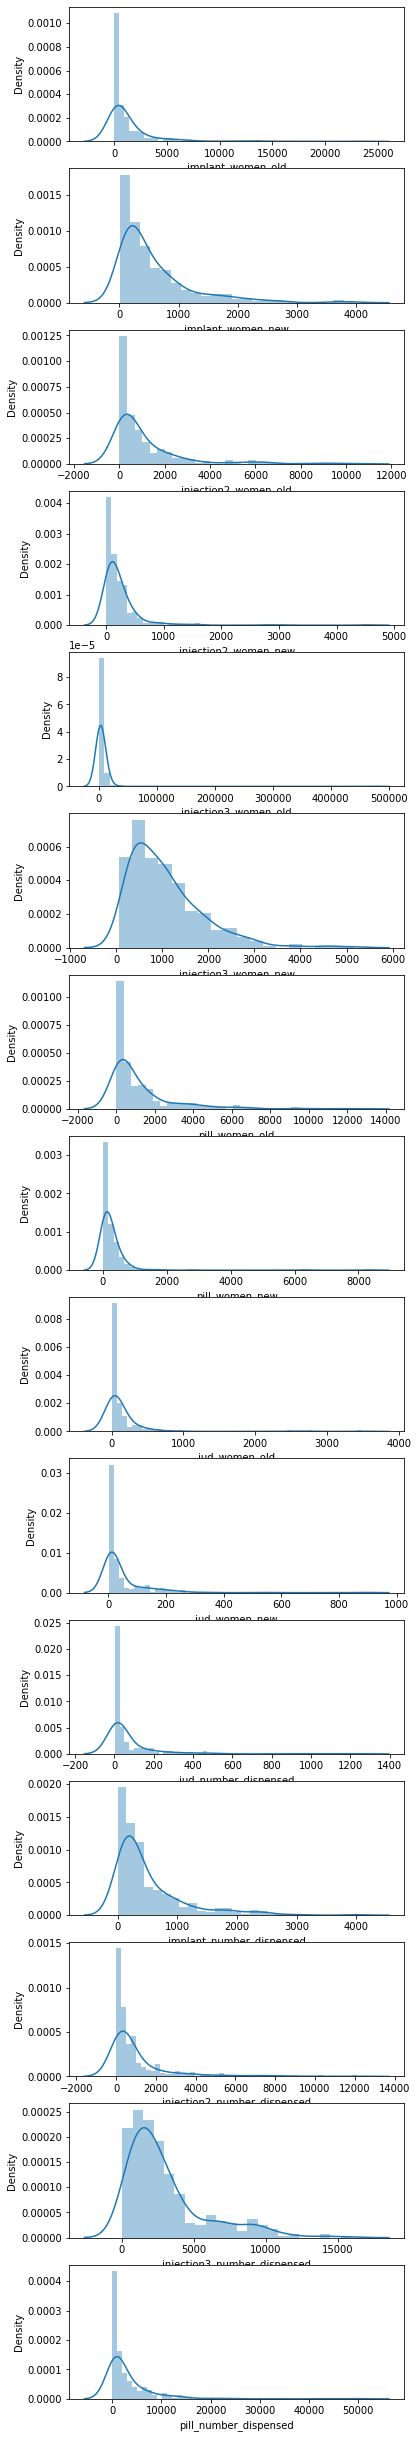

In [ ]:
# distribution
import seaborn as sns
cols = ['implant_women_old', 'implant_women_new',
       'injection2_women_old', 'injection2_women_new', 'injection3_women_old',
       'injection3_women_new', 'pill_women_old', 'pill_women_new',
       'iud_women_old', 'iud_women_new', 'iud_number_dispensed',
       'implant_number_dispensed', 'injection2_number_dispensed',
       'injection3_number_dispensed', 'pill_number_dispensed']

fig, axs = plt.subplots(len(cols), figsize=(6,44))

for i, col_val in enumerate(cols):
    sns.distplot(annual[col_val], ax=axs[i])
    axs[i].set_xlabel(col_val, fontsize=10)